# Problem statement

  Approach
  
* Data cleaning

* Data validation

* EDA

* Data visualization

* Recommendation & conclusion

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

df= pd.read_csv("retail_sales_dataset.csv")
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
# check for duplicates

df.duplicated().sum()

0

In [6]:
print("RETAIL SALES DATA ANALYSIS")
print("_" * 40)

df["Product Category"].value_counts()

RETAIL SALES DATA ANALYSIS
________________________________________


Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [7]:
df["Gender"].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [8]:
# Monthly Sales
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month') ['Total Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()
monthly_sales = monthly_sales.sort_values('Month')
print(monthly_sales)

        Month  Total Amount
0  2023-01-01         35450
1  2023-02-01         44060
2  2023-03-01         28990
3  2023-04-01         33870
4  2023-05-01         53150
5  2023-06-01         36715
6  2023-07-01         35465
7  2023-08-01         36960
8  2023-09-01         23620
9  2023-10-01         46580
10 2023-11-01         34920
11 2023-12-01         44690
12 2024-01-01          1530


In [9]:
#Number of Customers
Total_Customers = df["Customer ID"].value_counts().sum()
print(f"Total Customers: {Total_Customers}")

Total Customers: 1000


In [10]:
Total_Revenue = df["Total Amount"].sum()
print(f"Total Revenue: ${Total_Revenue}")

Total Revenue: $456000


In [11]:
total_unit_sold = df["Quantity"].sum()
print(f"Total Unit Sold: {total_unit_sold}")

Total Unit Sold: 2514


In [12]:
total_transactions = df["Transaction ID"].nunique()
print(f"Total Transactions: {total_transactions}")

Total Transactions: 1000


In [13]:
avg_transaction_value = Total_Revenue / total_transactions
print(f"Average Transaction Value: ${avg_transaction_value}")

Average Transaction Value: $456.0


In [18]:
revenue_by_gender = df.groupby('Gender')["Total Amount"].sum()
print(f" Revenue By Gender: {revenue_by_gender}")

 Revenue By Gender: Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [15]:
# Define  Age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd. cut(df['Age'], bins=bins, labels=labels,right=True)

sales_by_age = df.groupby('Age Group')['Total Amount'].sum().reset_index()
print(sales_by_age)

  Age Group  Total Amount
0     18-25         73335
1     26-35         98480
2     36-45         91870
3     46-55        100690
4     56-65         80410


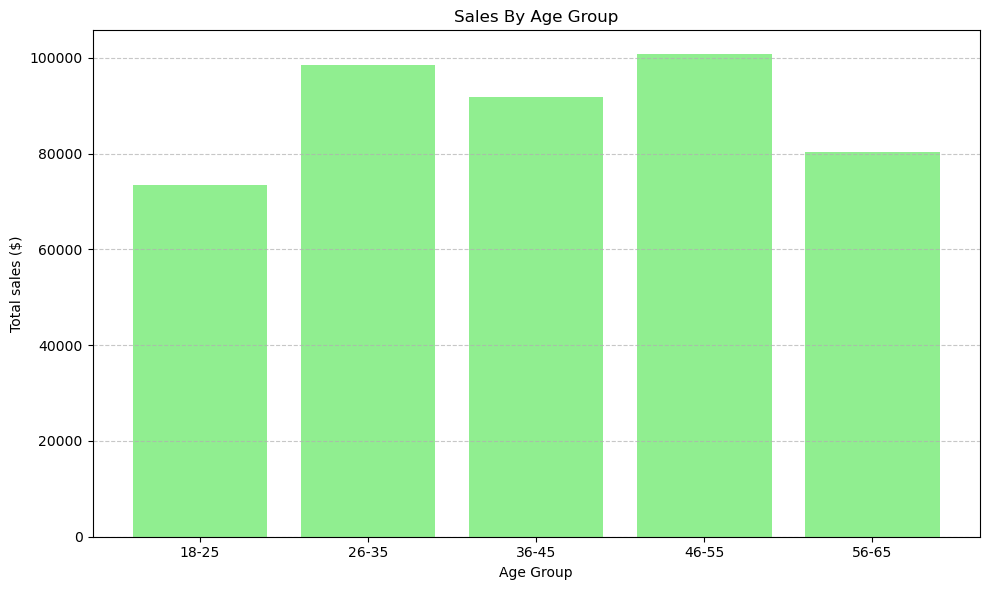

In [16]:
# Plot Sales By Gender
plt.figure(figsize=(10,6))
plt.bar(sales_by_age['Age Group'], sales_by_age['Total Amount'], color='lightgreen')
plt.title('Sales By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total sales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()         

   Gender  Total Amount
0  Female        232840
1    Male        223160


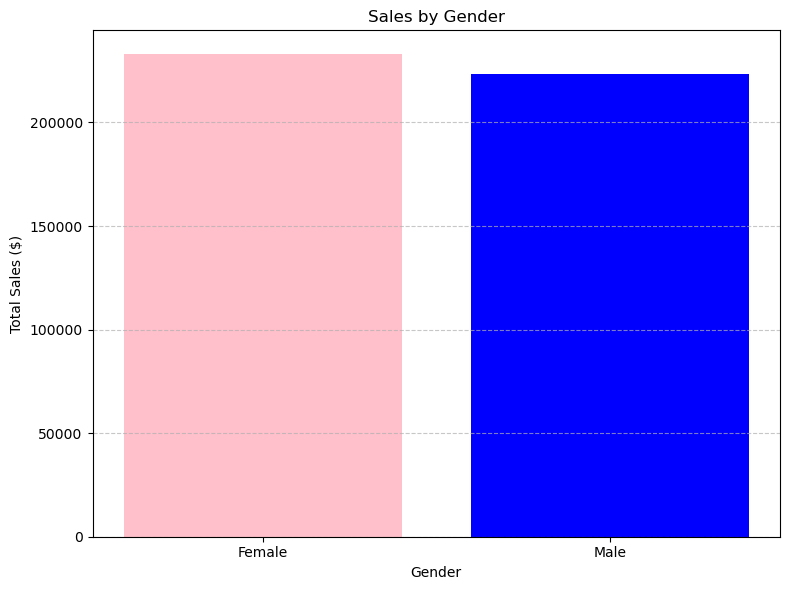

In [22]:
sales_by_gender = df.groupby('Gender')['Total Amount'].sum().reset_index()
sales_by_gender = sales_by_gender.sort_values('Total Amount', ascending=False)
print(sales_by_gender)

# Plot the sales by gender
plt.figure(figsize=(8, 6))
plt.bar(sales_by_gender['Gender'], sales_by_gender['Total Amount'], color=['pink', 'blue'])
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


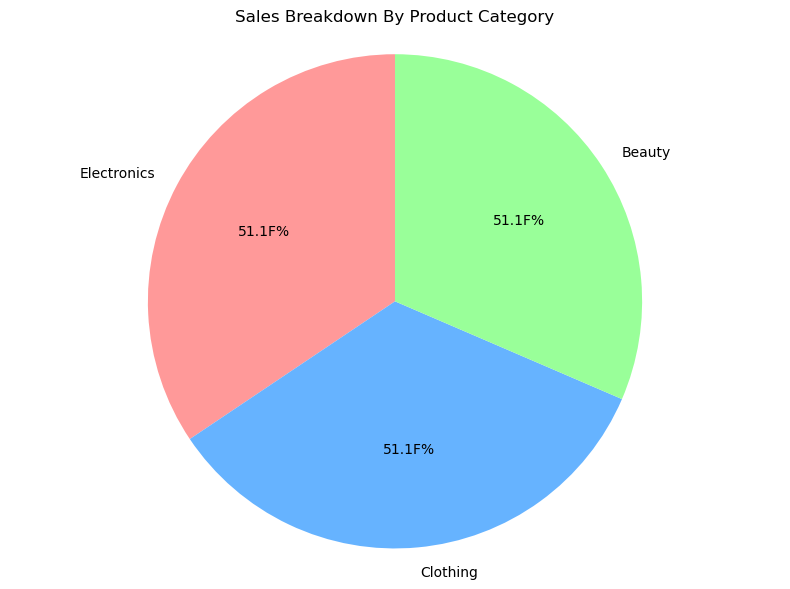

In [27]:
# Sales by category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()
sales_by_category = sales_by_category.sort_values('Total Amount', ascending=False)
print(sales_by_category)

# Plot the sales by category as pie chart
plt.figure(figsize=(8,6))
plt.pie(sales_by_category['Total Amount'], labels=sales_by_category['Product Category'],
        autopct='51.1F%%',startangle=90,colors=['#ff9999','#66b3ff', '#99ff99'])
plt.title('Sales Breakdown By Product Category')
plt.axis('equal') 
plt.tight_layout()
plt.show()